In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel('Data_Train_Flight.xlsx')
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_test = pd.read_excel('Data_Test_Flight.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
df_train['Data']='Train'
df_test['Data']='Test'
df_test['Price']=0

In [9]:
df_flight=pd.concat([df_train,df_test])
df_flight.head()

,Additional_Info,Airline,Arrival_Time,Data,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,Train,24/03/2019,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,Train,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,Train,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,Train,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,Train,01/03/2019,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop


In [10]:
df_flight.shape

(13354, 12)

In [11]:
df_flight['Data'].value_counts()

Train    10683
Test      2671
Name: Data, dtype: int64

In [12]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Data               13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              13354 non-null int64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [13]:
df_flight.dtypes

Additional_Info    object
Airline            object
Arrival_Time       object
Data               object
Date_of_Journey    object
Dep_Time           object
Destination        object
Duration           object
Price               int64
Route              object
Source             object
Total_Stops        object
dtype: object

In [14]:
#Date of journey is an object,splitting it into date,month and year and converting into int
df_flight['Date']=df_flight['Date_of_Journey'].str.split('/').str[0].astype(int)
df_flight['Month']=df_flight['Date_of_Journey'].str.split('/').str[1].astype(int)
df_flight['Year']=df_flight['Date_of_Journey'].str.split('/').str[2].astype(int)

In [15]:
df_flight

,Additional_Info,Airline,Arrival_Time,Data,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10 22 Mar,Train,24/03/2019,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,Train,1/05/2019,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25 10 Jun,Train,9/06/2019,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,Train,12/05/2019,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,Train,01/03/2019,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,20:25 07 Jun,Test,6/06/2019,20:30,Banglore,23h 55m,0,CCU → DEL → BLR,Kolkata,1 stop,6,6,2019
2667,No info,IndiGo,16:55,Test,27/03/2019,14:20,Banglore,2h 35m,0,CCU → BLR,Kolkata,non-stop,27,3,2019
2668,No info,Jet Airways,04:25 07 Mar,Test,6/03/2019,21:50,Cochin,6h 35m,0,DEL → BOM → COK,Delhi,1 stop,6,3,2019
2669,No info,Air India,19:15,Test,6/03/2019,04:00,Cochin,15h 15m,0,DEL → BOM → COK,Delhi,1 stop,6,3,2019


In [16]:
df_flight[['Date','Month','Year']].dtypes

Date     int32
Month    int32
Year     int32
dtype: object

In [17]:
#Dropping date of journey column
df_flight=df_flight.drop(['Date_of_Journey'],axis=1)

In [18]:
df_flight

,Additional_Info,Airline,Arrival_Time,Data,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year
0,No info,IndiGo,01:10 22 Mar,Train,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019
1,No info,Air India,13:15,Train,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019
2,No info,Jet Airways,04:25 10 Jun,Train,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019
3,No info,IndiGo,23:30,Train,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019
4,No info,IndiGo,21:35,Train,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,20:25 07 Jun,Test,20:30,Banglore,23h 55m,0,CCU → DEL → BLR,Kolkata,1 stop,6,6,2019
2667,No info,IndiGo,16:55,Test,14:20,Banglore,2h 35m,0,CCU → BLR,Kolkata,non-stop,27,3,2019
2668,No info,Jet Airways,04:25 07 Mar,Test,21:50,Cochin,6h 35m,0,DEL → BOM → COK,Delhi,1 stop,6,3,2019
2669,No info,Air India,19:15,Test,04:00,Cochin,15h 15m,0,DEL → BOM → COK,Delhi,1 stop,6,3,2019


In [19]:
#Airline column
df_flight['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [20]:
df_flight['Airline'].isnull().sum()

0

In [21]:
df_flight['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [22]:
#Additional Info
df_flight['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [23]:
df_flight['Additional_Info'].replace(['No Info'],['No info'],inplace=True)

In [24]:
df_flight['Additional_Info'].value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [25]:
df_flight['Additional_Info'].isnull().sum()

0

In [26]:
#Arrival Time
df_flight['Arrival_Time']=df_flight['Arrival_Time'].str.split(' ').str[0]
df_flight['Arrival_Hour']=df_flight['Arrival_Time'].str.split(':').str[0]
df_flight['Arrival_Minute']=df_flight['Arrival_Time'].str.split(':').str[1]

In [27]:
df_flight

,Additional_Info,Airline,Arrival_Time,Data,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,No info,IndiGo,01:10,Train,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019,01,10
1,No info,Air India,13:15,Train,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019,13,15
2,No info,Jet Airways,04:25,Train,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019,04,25
3,No info,IndiGo,23:30,Train,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019,23,30
4,No info,IndiGo,21:35,Train,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,20:25,Test,20:30,Banglore,23h 55m,0,CCU → DEL → BLR,Kolkata,1 stop,6,6,2019,20,25
2667,No info,IndiGo,16:55,Test,14:20,Banglore,2h 35m,0,CCU → BLR,Kolkata,non-stop,27,3,2019,16,55
2668,No info,Jet Airways,04:25,Test,21:50,Cochin,6h 35m,0,DEL → BOM → COK,Delhi,1 stop,6,3,2019,04,25
2669,No info,Air India,19:15,Test,04:00,Cochin,15h 15m,0,DEL → BOM → COK,Delhi,1 stop,6,3,2019,19,15


In [28]:
df_flight['Arrival_Hour']=df_flight['Arrival_Hour'].astype(int)
df_flight['Arrival_Minute']=df_flight['Arrival_Minute'].astype(int)

In [29]:
df_flight[['Arrival_Minute','Arrival_Hour']].dtypes

Arrival_Minute    int32
Arrival_Hour      int32
dtype: object

In [30]:
#Arrival Time
df_flight['Dep_Hour']=df_flight['Dep_Time'].str.split(':').str[0]
df_flight['Dep_Minute']=df_flight['Dep_Time'].str.split(':').str[1]

In [31]:
df_flight['Dep_Hour']=df_flight['Dep_Hour'].astype(int)
df_flight['Dep_Minute']=df_flight['Dep_Minute'].astype(int)

In [32]:
df_flight.head()

,Additional_Info,Airline,Arrival_Time,Data,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,No info,IndiGo,01:10,Train,22:20,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019,1,10,22,20
1,No info,Air India,13:15,Train,05:50,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019,13,15,5,50
2,No info,Jet Airways,04:25,Train,09:25,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019,4,25,9,25
3,No info,IndiGo,23:30,Train,18:05,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019,23,30,18,5
4,No info,IndiGo,21:35,Train,16:50,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019,21,35,16,50


In [33]:
#Deleting Arrival & Dep time columns
df_flight=df_flight.drop(['Dep_Time','Arrival_Time'],axis=1)

In [34]:
df_flight.head()

,Additional_Info,Airline,Data,Destination,Duration,Price,Route,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,No info,IndiGo,Train,New Delhi,2h 50m,3897,BLR → DEL,Banglore,non-stop,24,3,2019,1,10,22,20
1,No info,Air India,Train,Banglore,7h 25m,7662,CCU → IXR → BBI → BLR,Kolkata,2 stops,1,5,2019,13,15,5,50
2,No info,Jet Airways,Train,Cochin,19h,13882,DEL → LKO → BOM → COK,Delhi,2 stops,9,6,2019,4,25,9,25
3,No info,IndiGo,Train,Banglore,5h 25m,6218,CCU → NAG → BLR,Kolkata,1 stop,12,5,2019,23,30,18,5
4,No info,IndiGo,Train,New Delhi,4h 45m,13302,BLR → NAG → DEL,Banglore,1 stop,1,3,2019,21,35,16,50


In [35]:
#Duration
hour=df_flight['Duration'].str.extract('(\d+)').astype('int')
minutes=df_flight['Duration'].str.slice(3,).str.extract('(\d+)')
minutes=minutes.fillna(0)
df_flight['Duration'] = minutes.astype(int)+(hour*60)

In [36]:
#Route
df_flight['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → IXC → DEL → HYD             1
CCU → IXA → BLR                   1
BOM → JDH → JAI → DEL → HYD       1
BOM → CCU → HYD                   1
BOM → VGA → TIR → HYD             1
Name: Route, Length: 132, dtype: int64

In [37]:
df_flight['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [38]:
df_flight['Route'].isnull().sum()

1

In [39]:
df_flight['Route'].mode()[0]

'DEL → BOM → COK'

In [40]:
df_flight['Route'].replace({'nan': 'DEL → BOM → COK'},inplace=True)
df_flight['Route'].fillna('DEL → BOM → COK',inplace=True)

In [41]:
df_flight['Route'].isnull().sum()

0

In [42]:
routes = list(df_flight['Route'])
routes

['BLR → DEL',
 'CCU → IXR → BBI → BLR',
 'DEL → LKO → BOM → COK',
 'CCU → NAG → BLR',
 'BLR → NAG → DEL',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'BLR → BOM → DEL',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → BLR → COK',
 'CCU → BLR',
 'MAA → CCU',
 'CCU → BOM → BLR',
 'CCU → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → PNQ → COK',
 'DEL → BOM → COK',
 'DEL → CCU → BOM → COK',
 'DEL → BOM → COK',
 'DEL → BOM → COK',
 'BLR → COK → DEL',
 'BLR → DEL',
 'BLR → DEL',
 'CCU → BOM → BLR',
 'DEL → IDR → BOM → COK',
 'DEL → LKO → COK',
 'DEL → BOM → COK',
 'BLR → DEL',
 'MAA → CCU',
 'MAA → CCU',
 'CCU → GAU → DEL → BLR',
 'BLR → DEL',
 'DEL → NAG → BOM → COK',
 'DEL → BOM → COK',
 'DEL → BOM → COK',
 'CCU → MAA → BLR',
 'CCU → BLR',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'DEL → HYD → COK',
 'BLR → BOM → DEL',
 'DEL → BOM → COK',
 'BLR → DEL',
 'DEL → BOM → COK',
 'BLR → DEL',
 'BLR → DEL',
 'MAA → CCU',
 'CCU → HYD → BLR',
 'DEL → AMD → BOM → COK',
 'DEL → COK',
 'CCU → DEL → BLR',
 'BLR → DEL',


In [43]:
max_route = 1
for i in routes :
    if len(i.split('→ ')) > max_route:
         max_route = len(i.split('→ '))
print("Maximum Flight routes in a row are: ", max_route) 

Maximum Flight routes in a row are:  6


In [44]:
df_flight['Route_1']=df_flight['Route'].str.split('→ ').str[0]
df_flight['Route_2']=df_flight['Route'].str.split('→ ').str[1]
df_flight['Route_3']=df_flight['Route'].str.split('→ ').str[2]
df_flight['Route_4']=df_flight['Route'].str.split('→ ').str[3]
df_flight['Route_5']=df_flight['Route'].str.split('→ ').str[4]
df_flight['Route_6']=df_flight['Route'].str.split('→ ').str[5]

In [45]:
df_flight.drop(['Route'],axis=1,inplace=True)
df_flight

,Additional_Info,Airline,Data,Destination,Duration,Price,Source,Total_Stops,Date,Month,...,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,No info,IndiGo,Train,New Delhi,170,3897,Banglore,non-stop,24,3,...,1,10,22,20,BLR,DEL,NaN,NaN,NaN,NaN
1,No info,Air India,Train,Banglore,445,7662,Kolkata,2 stops,1,5,...,13,15,5,50,CCU,IXR,BBI,BLR,NaN,NaN
2,No info,Jet Airways,Train,Cochin,1140,13882,Delhi,2 stops,9,6,...,4,25,9,25,DEL,LKO,BOM,COK,NaN,NaN
3,No info,IndiGo,Train,Banglore,325,6218,Kolkata,1 stop,12,5,...,23,30,18,5,CCU,NAG,BLR,NaN,NaN,NaN
4,No info,IndiGo,Train,New Delhi,285,13302,Banglore,1 stop,1,3,...,21,35,16,50,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,No info,Air India,Test,Banglore,1435,0,Kolkata,1 stop,6,6,...,20,25,20,30,CCU,DEL,BLR,NaN,NaN,NaN
2667,No info,IndiGo,Test,Banglore,155,0,Kolkata,non-stop,27,3,...,16,55,14,20,CCU,BLR,NaN,NaN,NaN,NaN
2668,No info,Jet Airways,Test,Cochin,395,0,Delhi,1 stop,6,3,...,4,25,21,50,DEL,BOM,COK,NaN,NaN,NaN
2669,No info,Air India,Test,Cochin,915,0,Delhi,1 stop,6,3,...,19,15,4,0,DEL,BOM,COK,NaN,NaN,NaN


In [46]:
#Total flights
df_flight['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [47]:
df_flight['Total_Stops']=df_flight['Total_Stops'].str.split(' ').str[0]

In [48]:
df_flight['Total_Stops'].isnull().sum()

1

In [49]:
df_flight['Total_Stops'].unique()

array(['non-stop', '2', '1', '3', nan, '4'], dtype=object)

In [50]:
df_flight['Total_Stops'].mode()[0]

'1'

In [51]:
df_flight['Total_Stops'].fillna('1',inplace=True)
df_flight['Total_Stops'].replace({'nan': '1'},inplace=True)

In [52]:
df_flight['Total_Stops'].isnull().sum()

0

In [53]:
df_flight['Total_Stops'].unique()

array(['non-stop', '2', '1', '3', '4'], dtype=object)

In [54]:
#Source Column
df_flight['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [55]:
df_flight['Source'].isnull().sum()

0

In [56]:
df_flight['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [57]:
df_flight['Destination'].isnull().sum()

0

In [58]:
df_flight['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [59]:
df_flight['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [60]:
df_flight['Route_1'].fillna('None',inplace=True)
df_flight['Route_2'].fillna('None',inplace=True)
df_flight['Route_3'].fillna('None',inplace=True)
df_flight['Route_4'].fillna('None',inplace=True)
df_flight['Route_5'].fillna('None',inplace=True)
df_flight['Route_6'].fillna('None',inplace=True)

In [61]:
df_flight.isnull().sum()

Additional_Info    0
Airline            0
Data               0
Destination        0
Duration           0
Price              0
Source             0
Total_Stops        0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

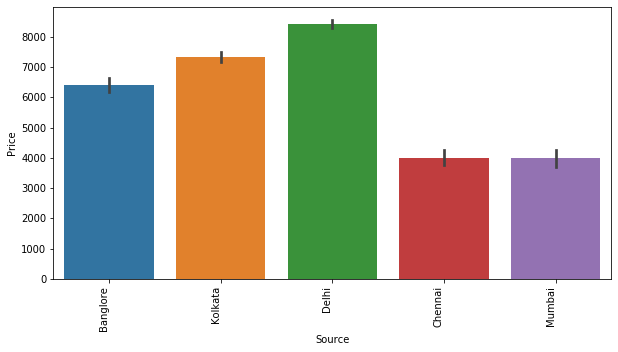

In [62]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Source',y='Price',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
#Tickets are costlier from Delhi

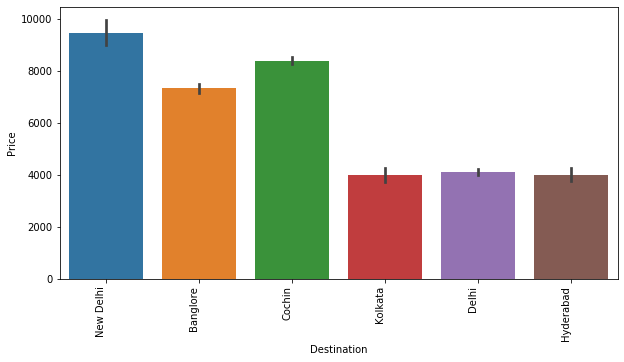

In [63]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Destination',y='Price',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
#Tickets to New Delhi are costlier

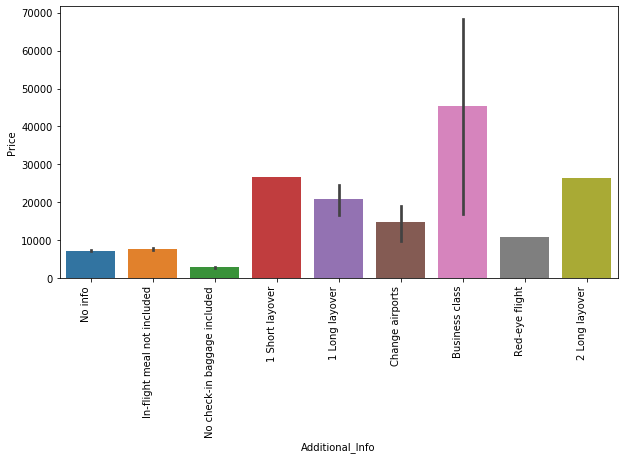

In [64]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Additional_Info',y='Price',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
#Business class have higher fare

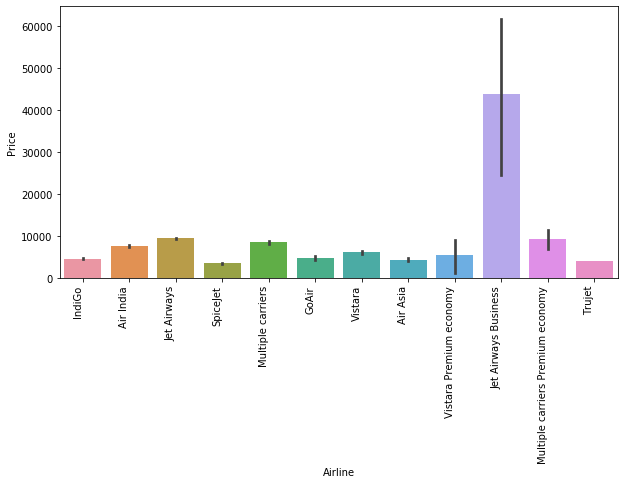

In [65]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Airline',y='Price',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
#Jet Airways Business has higher price

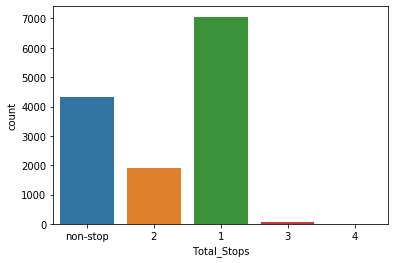

In [66]:
sns.countplot(x='Total_Stops',data=df_flight)
#Flights are more of 1 stop

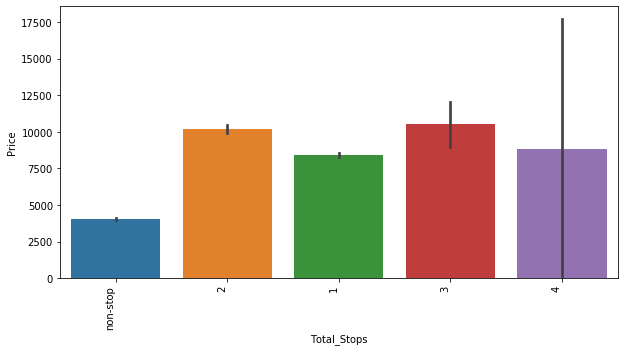

In [67]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Total_Stops',y='Price',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

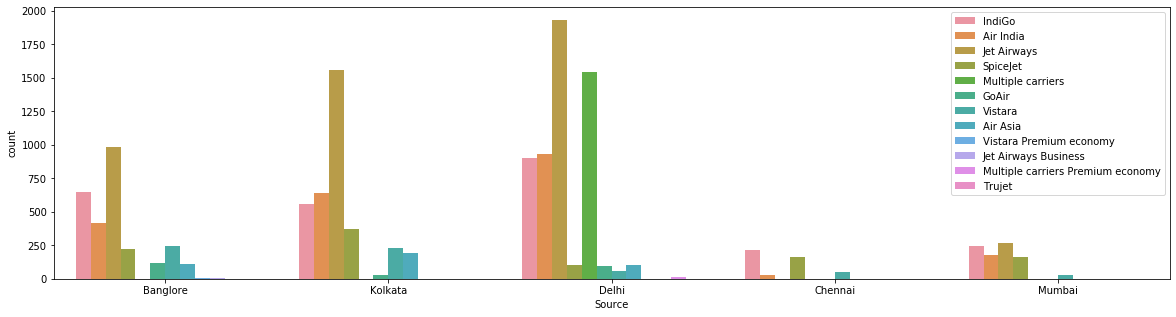

In [68]:
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df_flight)
plt.legend(loc='upper right')
plt.show()

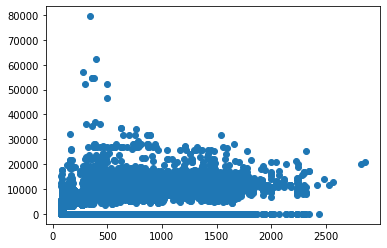

In [69]:
plt.scatter(x='Duration',y='Price',data=df_flight)
plt.show()

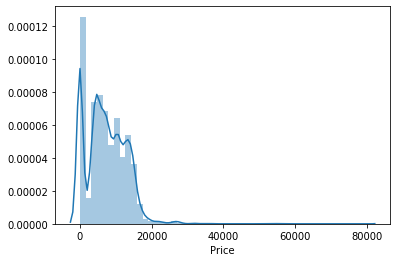

In [70]:
sns.distplot(df_flight['Price'])

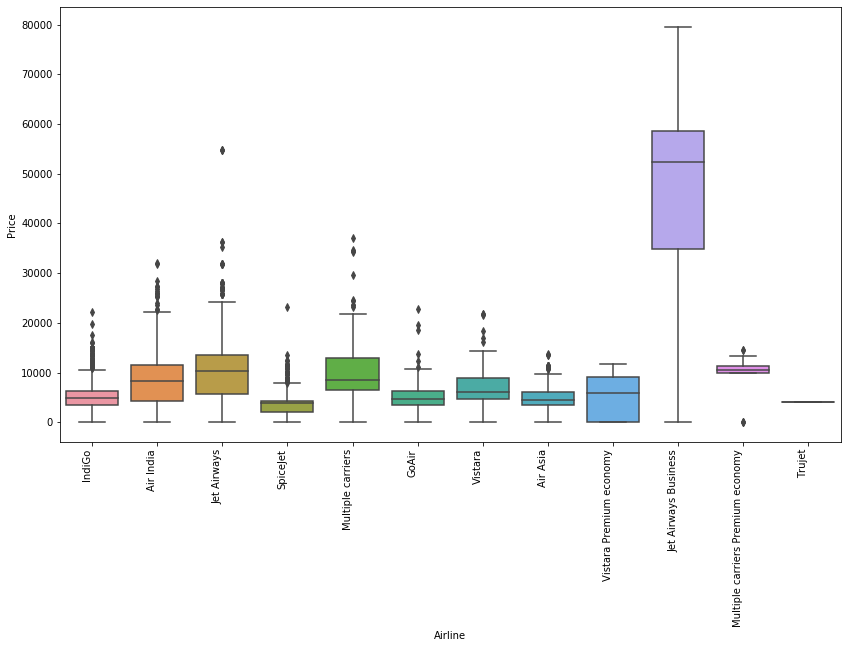

In [71]:
plt.figure(figsize = (14,8))
ax1=sns.boxplot(x='Airline',y='Price',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

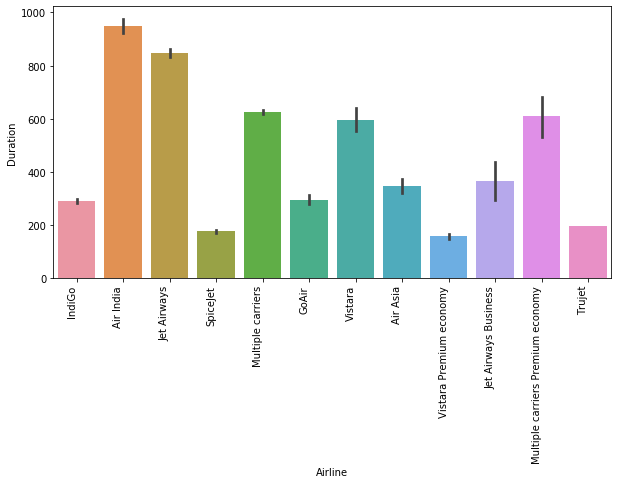

In [72]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Airline',y='Duration',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

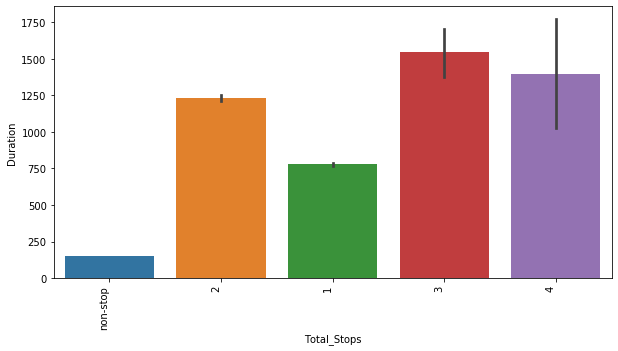

In [73]:
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Total_Stops',y='Duration',data=df_flight)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [74]:
df_flight.dtypes

Additional_Info    object
Airline            object
Data               object
Destination        object
Duration            int32
Price               int64
Source             object
Total_Stops        object
Date                int32
Month               int32
Year                int32
Arrival_Hour        int32
Arrival_Minute      int32
Dep_Hour            int32
Dep_Minute          int32
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Route_5            object
Route_6            object
dtype: object

In [75]:
from sklearn import preprocessing
for cols in df_flight.columns:
    if df_flight[cols].dtypes=='object':
        le= preprocessing.LabelEncoder()
        df_flight[cols] = le.fit_transform(df_flight[cols])

In [76]:
df_flight

,Additional_Info,Airline,Data,Destination,Duration,Price,Source,Total_Stops,Date,Month,...,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,7,3,1,5,170,3897,0,4,24,3,...,1,10,22,20,0,13,24,12,4,1
1,7,1,1,0,445,7662,3,1,1,5,...,13,15,5,50,2,25,1,3,4,1
2,7,4,1,1,1140,13882,2,1,9,6,...,4,25,9,25,3,32,4,5,4,1
3,7,3,1,0,325,6218,3,0,12,5,...,23,30,18,5,2,34,3,12,4,1
4,7,3,1,5,285,13302,0,0,1,3,...,21,35,16,50,0,34,8,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,7,1,0,0,1435,0,3,0,6,6,...,20,25,20,30,2,14,3,12,4,1
2667,7,3,0,0,155,0,3,4,27,3,...,16,55,14,20,2,5,24,12,4,1
2668,7,4,0,1,395,0,2,0,6,3,...,4,25,21,50,3,7,6,12,4,1
2669,7,1,0,1,915,0,2,0,6,3,...,19,15,4,0,3,7,6,12,4,1


In [77]:
df_train_final=df_flight.loc[df_flight['Data']==1]
df_train_final.drop(['Data'],axis=1,inplace=True)

In [78]:
df_train_final

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,7,3,5,170,3897,0,4,24,3,2019,1,10,22,20,0,13,24,12,4,1
1,7,1,0,445,7662,3,1,1,5,2019,13,15,5,50,2,25,1,3,4,1
2,7,4,1,1140,13882,2,1,9,6,2019,4,25,9,25,3,32,4,5,4,1
3,7,3,0,325,6218,3,0,12,5,2019,23,30,18,5,2,34,3,12,4,1
4,7,3,5,285,13302,0,0,1,3,2019,21,35,16,50,0,34,8,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,0,0,150,4107,3,4,9,4,2019,22,25,19,55,2,5,24,12,4,1
10679,7,1,0,155,4145,3,4,27,4,2019,23,20,20,45,2,5,24,12,4,1
10680,7,4,2,180,7229,0,4,27,4,2019,11,20,8,20,0,13,24,12,4,1
10681,7,10,5,160,12648,0,4,1,3,2019,14,10,11,30,0,13,24,12,4,1


In [79]:
df_test_final=df_flight.loc[df_flight['Data']==0]
df_test_final.drop(['Price'],axis=1,inplace=True)
df_test_final.drop(['Data'],axis=1,inplace=True)

In [80]:
df_test_final

,Additional_Info,Airline,Destination,Duration,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,7,4,1,655,2,0,6,6,2019,4,25,17,30,3,7,6,12,4,1
1,7,3,0,240,3,0,12,5,2019,10,20,6,20,2,33,3,12,4,1
2,5,4,1,1425,2,0,21,5,2019,19,0,19,15,3,7,6,12,4,1
3,7,6,1,780,2,0,21,5,2019,21,0,8,0,3,7,6,12,4,1
4,7,0,2,170,0,4,24,6,2019,2,45,23,55,0,13,24,12,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,7,1,0,1435,3,0,6,6,2019,20,25,20,30,2,14,3,12,4,1
2667,7,3,0,155,3,4,27,3,2019,16,55,14,20,2,5,24,12,4,1
2668,7,4,1,395,2,0,6,3,2019,4,25,21,50,3,7,6,12,4,1
2669,7,1,1,915,2,0,6,3,2019,19,15,4,0,3,7,6,12,4,1


In [81]:
df_train_final.corr()

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
Additional_Info,1.000000,-0.077793,0.013089,-0.152957,-0.063769,-0.015856,0.145884,-0.012839,-0.045454,NaN,0.031137,0.039346,-0.048103,-0.026029,0.023329,0.076868,0.150816,-0.046915,-0.032832,0.029812
Airline,-0.077793,1.000000,0.018479,-0.159879,-0.039520,-0.013401,0.036064,0.026238,0.024643,NaN,-0.007491,-0.071089,-0.035194,-0.060044,0.035209,-0.061335,0.052733,0.261864,0.055014,0.012201
Destination,0.013089,0.018479,1.000000,-0.257321,-0.071112,-0.592574,0.337883,-0.040998,-0.364686,NaN,-0.039710,0.017196,-0.072979,0.127892,-0.483347,0.077902,0.423513,0.135094,0.014687,-0.023382
Duration,-0.152957,-0.159879,-0.257321,1.000000,0.506495,0.161977,-0.602359,-0.022612,0.014791,NaN,0.051458,-0.069557,0.002035,-0.018865,0.289806,0.036361,-0.641975,-0.479766,-0.110978,-0.021471
Price,-0.063769,-0.039520,-0.071112,0.506495,1.000000,0.015998,-0.571174,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.006819,-0.024492,0.182135,-0.087218,-0.579111,-0.314799,-0.053102,-0.018043
Source,-0.015856,-0.013401,-0.592574,0.161977,0.015998,1.000000,-0.225601,0.004898,0.183268,NaN,0.025632,0.021040,0.059044,-0.056991,0.437882,0.035844,-0.279563,-0.077348,-0.011251,0.016046
Total_Stops,0.145884,0.036064,0.337883,-0.602359,-0.571174,-0.225601,1.000000,0.029290,-0.026346,NaN,-0.095598,0.175973,0.039268,0.048813,-0.445063,0.036009,0.948622,0.097824,-0.018492,-0.008260
Date,-0.012839,0.026238,-0.040998,-0.022612,-0.153738,0.004898,0.029290,1.000000,-0.038378,NaN,-0.003192,-0.017511,0.002220,-0.008261,0.079652,-0.024689,0.021847,-0.018875,0.004572,0.014274
Month,-0.045454,0.024643,-0.364686,0.014791,-0.103651,0.183268,-0.026346,-0.038378,1.000000,NaN,-0.003941,-0.100626,0.039112,-0.059238,0.230668,0.048393,-0.095178,-0.073203,-0.001621,0.014199
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_train_final.skew()

Additional_Info     -2.114551
Airline              0.731095
Destination          1.244169
Duration             0.861203
Price                1.812552
Source              -0.424054
Total_Stops          0.631681
Date                 0.118351
Month               -0.387493
Year                 0.000000
Arrival_Hour        -0.369988
Arrival_Minute       0.110945
Dep_Hour             0.113073
Dep_Minute           0.167029
Route_1             -0.618662
Route_2              1.424628
Route_3              0.582726
Route_4             -2.103955
Route_5            -16.441613
Route_6           -103.358599
dtype: float64

In [85]:
#Removing skewness
import numpy as np
for index in df_train_final.skew().index:
    if df_train_final.skew().loc[index]>0.5:
        df_train_final[index]=np.sqrt(df_train_final[index])

In [86]:
df_train_final.skew()

Additional_Info     -2.114551
Airline             -0.473393
Destination          0.022293
Duration             0.341765
Price                0.431747
Source              -0.424054
Total_Stops          0.397537
Date                 0.118351
Month               -0.387493
Year                 0.000000
Arrival_Hour        -0.369988
Arrival_Minute       0.110945
Dep_Hour             0.113073
Dep_Minute           0.167029
Route_1             -0.618662
Route_2              0.237049
Route_3              0.436100
Route_4             -2.103955
Route_5            -16.441613
Route_6           -103.358599
dtype: float64

In [87]:
df_test_final.skew()

Additional_Info    -1.839584
Airline             0.680800
Destination         1.263630
Duration            0.896658
Source             -0.424997
Total_Stops         0.672623
Date                0.199540
Month              -0.403700
Year                0.000000
Arrival_Hour       -0.443166
Arrival_Minute      0.115267
Dep_Hour            0.093759
Dep_Minute          0.128515
Route_1            -0.622460
Route_2             1.428070
Route_3             0.623373
Route_4            -2.112967
Route_5           -16.017284
Route_6           -51.681718
dtype: float64

In [88]:
#Removing skewness
import numpy as np
for index in df_test_final.skew().index:
    if df_test_final.skew().loc[index]>0.5:
        df_test_final[index]=np.sqrt(df_test_final[index])

In [89]:
df_x=df_train_final.drop(['Price'],axis=1)
df_x.head()

,Additional_Info,Airline,Destination,Duration,Source,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,7,1.732051,2.236068,13.038405,0,2.0,24,3,2019,1,10,22,20,0,3.605551,4.898979,12,4,1
1,7,1.000000,0.000000,21.095023,3,1.0,1,5,2019,13,15,5,50,2,5.000000,1.000000,3,4,1
2,7,2.000000,1.000000,33.763886,2,1.0,9,6,2019,4,25,9,25,3,5.656854,2.000000,5,4,1
3,7,1.732051,0.000000,18.027756,3,0.0,12,5,2019,23,30,18,5,2,5.830952,1.732051,12,4,1
4,7,1.732051,2.236068,16.881943,0,0.0,1,3,2019,21,35,16,50,0,5.830952,2.828427,12,4,1


In [90]:
df_y=df_train_final['Price']
df_y.head()

0     62.425956
1     87.532851
2    117.821899
3     78.854296
4    115.334297
Name: Price, dtype: float64

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,df_y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [92]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,df_x,df_y):
    cvs=cross_val_score(model,df_x,df_y,cv=5,scoring="r2")
    print("Mean r2 score : ",cvs.mean())
    print("standard deviation in r2 score for regressor: ",cvs.std())
    print(cvs)

In [93]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
r_state = maxr2_score(lg,df_x,df_y)

max r2 score corresponding to  77  is  0.6010363886344625


In [94]:
model_evaluation(lg,df_x,df_y)

Mean r2 score :  0.5702787311886905
standard deviation in r2 score for regressor:  0.012081626562853408
[0.57674375 0.58427564 0.57752642 0.55114765 0.5617002 ]


In [95]:
#AdaBoost regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor(base_estimator =lg)
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_1 = GridSearchCV(ada_reg,parameters,cv=5)
ada_1.fit(df_x,df_y)
ada_1.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [96]:
add_reg=AdaBoostRegressor(base_estimator=lg,learning_rate=0.001,n_estimators=100)
print("Mean r2 score for Ada boosting Regression: ",cross_val_score(ada_reg,df_x,df_y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Ada boosting Regression: ",cross_val_score(ada_reg,df_x,df_y,cv=5,scoring="r2").std())

Mean r2 score for Ada boosting Regression:  0.378722580753535
Standard deviation in r2 score for Ada boosting Regression:  0.06049357574045018


In [97]:
r_state=maxr2_score(ada_reg,df_x,df_y)

max r2 score corresponding to  48  is  0.5122877307028288


In [98]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
r_state = maxr2_score(rf,df_x,df_y)

max r2 score corresponding to  77  is  0.9361972744762028


In [99]:
model_evaluation(rf,df_x,df_y)

Mean r2 score :  0.9171861216761066
standard deviation in r2 score for regressor:  0.004367939922889286
[0.91643442 0.92251292 0.91874846 0.91887028 0.90936453]


In [100]:
parameters= {'bootstrap': [True, False],
             'max_depth': [10,40],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1,4],
             'min_samples_split': [5,10],
             'n_estimators': [10,50]}

rf_cv = RandomForestRegressor()
rf_random = GridSearchCV(rf, parameters,refit = True, verbose = 3)
rf_random.fit(df_x,df_y)
rf_random.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.888, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.901, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.886, total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.893, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.904, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.887, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estima

[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.847, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.838, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.852, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.827, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estima

[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.900, total=   1.1s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.917, total=   1.1s
[CV] bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50 
[CV]  bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.892, total=   1.0s
[CV] bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.903, 

[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.858, total=   1.1s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.868, total=   0.2s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.864, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, score=0.855, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_spli

[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, score=0.843, total=   0.1s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.858, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.864, total=   0.4s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.842, total=   0.3s
[CV] bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, 

[CV]  bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, score=0.865, total=   1.4s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.907, total=   0.3s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.905, total=   0.2s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10 
[CV]  bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, score=0.900, total=   0.1s
[CV] bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  1.5min finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [101]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.911875129504795
{'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [102]:
rf_gcv = RandomForestRegressor(bootstrap='True',max_depth=40,min_samples_leaf=1,n_estimators=5,min_samples_split=5,max_features='auto')
r_state = maxr2_score(rf_gcv,df_x,df_y)

max r2 score corresponding to  99  is  0.9311860005499809


In [103]:
model_evaluation(rf_gcv,df_x,df_y)

Mean r2 score :  0.906723185185166
standard deviation in r2 score for regressor:  0.005084492907131354
[0.91456144 0.90235628 0.90468229 0.91067508 0.90134085]


In [104]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()  
r_state = maxr2_score(dtr,df_x,df_y)

max r2 score corresponding to  49  is  0.9008499799110428


In [105]:
model_evaluation(dtr,df_x,df_y)

Mean r2 score :  0.8769701131030849
standard deviation in r2 score for regressor:  0.015708930965388276
[0.87145663 0.90224295 0.88605522 0.85679474 0.86830103]


In [106]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20],
              "max_depth": [2,8],
              "min_samples_leaf": [20,50],
              "max_leaf_nodes": [5, 20]
              }
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)
grid_cv_dtr.fit(df_x,df_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 8],
                         'max_leaf_nodes': [5, 20],
                         'min_samples_leaf': [20, 50],
                         'min_

In [107]:
print(grid_cv_dtr.best_score_)
print(grid_cv_dtr.best_params_)

0.7336003272807615
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [108]:
dtr_gcv = DecisionTreeRegressor(criterion='mse',max_depth=8,max_leaf_nodes=20,min_samples_leaf=20,min_samples_split=20)
r_state = maxr2_score(dtr_gcv,df_x,df_y)

max r2 score corresponding to  64  is  0.7818803281429397


In [109]:
model_evaluation(dtr_gcv,df_x,df_y)

Mean r2 score :  0.7335983557636622
standard deviation in r2 score for regressor:  0.009102993026758452
[0.74296462 0.74117461 0.73771755 0.71916685 0.72696814]


In [110]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
r_state=maxr2_score(knr,df_x,df_y)

max r2 score corresponding to  64  is  0.7523073729990528


In [111]:
model_evaluation(knr,df_x,df_y)

Mean r2 score :  0.7101038798174628
standard deviation in r2 score for regressor:  0.010863125427156175
[0.70846208 0.72588526 0.70952087 0.69223371 0.71441748]


In [112]:
#GridSearch CV on KNN regressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
knr_cv = GridSearchCV(knr,neighbors,cv=10)
knr_cv.fit(df_x,df_y)
knr_cv.best_params_

{'n_neighbors': 3}

In [113]:
knr_gcv = KNeighborsRegressor(n_neighbors=3)
r_state = maxr2_score(knr_gcv,df_x,df_y)

max r2 score corresponding to  51  is  0.7559805125512402


In [114]:
model_evaluation(knr_gcv,df_x,df_y)

Mean r2 score :  0.7216239000581917
standard deviation in r2 score for regressor:  0.009948954556857596
[0.72814636 0.72894745 0.71629612 0.70444066 0.73028892]


In [115]:
from sklearn.svm import SVR
svr = SVR(kernel = "linear")
r_state = maxr2_score(svr,df_x,df_y)

max r2 score corresponding to  57  is  0.41827832245767305


In [116]:
model_evaluation(svr,df_x,df_y)

Mean r2 score :  -0.036535618401372386
standard deviation in r2 score for regressor:  0.1916542813373454
[ 0.01531305 -0.06241013 -0.39082301  0.14865306  0.10658893]


In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y,random_state =77,test_size=0.20)
rf_final = RandomForestRegressor()
rf_final.fit(x_train,y_train)
y_pred=rf_final.predict(x_test)

In [120]:
print("r2_score is: ",r2_score(y_test,y_pred))

r2_score is:  0.9368887754301798


In [121]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error: 3.1711557140096005
Mean squared error: 33.01523958950881
Root mean squared error: 5.745888929444147


In [122]:
print("Predicted Value:",y_pred)
print("Actual Value:",y_test)

Predicted Value: [ 85.02352616 105.25898745  81.99938992 ...  60.05691542  93.53896221
  75.56705262]
Actual Value: 7967     85.023526
4563    105.830052
9555    111.968746
6650    102.610916
8275    104.761634
           ...    
9644     45.276926
1171    117.821899
6505     58.472216
753      92.639085
1431     73.878278
Name: Price, Length: 2137, dtype: float64


In [123]:
#Selecting Random Forest Regressor model as final model
from sklearn.externals import joblib
joblib.dump(rf_final,"Model_Flight_Price.pkl")

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Model_Flight_Price.pkl']

In [124]:
model=joblib.load("Model_Flight_Price.pkl")
test_cost = model.predict(df_test_final)
test_cost

array([121.30127782,  65.11698296, 113.56936207, ..., 126.35105091,
       117.64340632,  86.71524084])

In [125]:
test_cost=pd.DataFrame(test_cost,columns=["Price"])

In [126]:
test_cost.to_csv("Flight_price_predict.csv",index=False)